In [1]:
%load_ext autoreload
%autoreload 2
%autosave 2

Autosaving every 2 seconds


In [2]:
from SceneR2.dataset import *
from SceneR2.models import ResLSTM
import SceneR2
from SceneR2.learners import ParallelLearner, ModelLearner
from SceneR2 import loss

In [3]:
globalVariables.path_to_vids

'../data/Daimler/100_vids/videos'

In [4]:
# Set video_180p as video path for smaller videos
globalVariables.path_to_vids='Daimler/100_vids/videos_180p'
globalVariables.path_to_vids

'../data/Daimler/100_vids/videos_180p'

In [5]:
np.random.seed(10) #seting seed for always selecting same train and test set
files = glob(os.path.join(globalVariables.path_to_csv, '*.csv'))
totalFiles=len(files)
testFiles=np.random.choice(totalFiles, int(0.2*totalFiles)) #20% files as test files
trainLoader=torch.utils.data.DataLoader(FusionData([d for i,d in enumerate(files) if i not in testFiles]))
testLoader=torch.utils.data.DataLoader(FusionData([d for i,d in enumerate(files) if i in testFiles]))

100%|██████████| 29/29 [00:17<00:00,  1.64it/s]


In [ ]:
os.makedirs('../data/Daimler/100_vids/pickled_SceneR2_dataloader/Fusion/29Mar', exist_ok=True)
with open("../data/Daimler/100_vids/pickled_SceneR2_dataloader/Fusion/29Mar/train", 'wb') as f:
    pickle.dump(trainLoader, f)
with open("../data/Daimler/100_vids/pickled_SceneR2_dataloader/Fusion/29Mar/test", 'wb') as f:
    pickle.dump(testLoader, f)

In [5]:
with open("../data/Daimler/100_vids/pickled_SceneR2_dataloader/Fusion/29Mar/train", 'rb') as f:
    trainLoader=pickle.load(f)
with open("../data/Daimler/100_vids/pickled_SceneR2_dataloader/Fusion/29Mar/test", 'rb') as f:
    testLoader=pickle.load(f)

In [6]:
trainLoader.dataset[0][0][0].shape # Shape of Video Sequence

(288, 3, 180, 240)

In [7]:
trainLoader.dataset[0][0][1].shape # Shape of CAN Data

(288, 4)

In [8]:
learner=ParallelLearner(
                [ModelLearner(ResLSTM(3, input_shape=(180,240)), lr=0.001, loss_fn=loss.FocalMSE, 
                              optim=torch.optim.SGD, modelName='Fusion_1' )
                ],
        epochs=10, trainLoader=trainLoader, validLoader=testLoader)

In [9]:
learner.train(100)

In [10]:
l=learner.learners[0]

In [14]:
l.train_confusion_matrix_list[-1]

array([[49,  2,  0],
       [30, 20,  0],
       [16,  0, 13]], dtype=int32)

In [15]:
l.valid_confusion_matrix_list[-1]

array([[4, 6, 0],
       [7, 5, 0],
       [3, 3, 0]], dtype=int32)

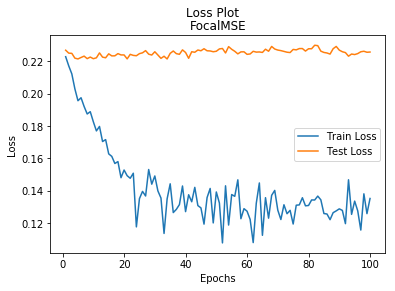

In [13]:
learner.plotLoss()

In [ ]:
l.tra